In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import cv2
import imageio
import datetime
import tensorflow as tf


# Root directory of the project
ROOT_DIR = os.path.abspath("../")
# Ignore Warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
print(ROOT_DIR)
from mrcnn import utils
import mrcnn.model_multi as modellib
from mrcnn import visualize
from samples.interior import classes
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/interior/"))  # To find local version
import interior_multi

%matplotlib inline 
%load_ext tensorboard

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
print('finished')

/home/julius/Projects/MVOD/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/julius/Projects/MVOD/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/julius/Projects/MVOD/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/julius/Projects/MVOD/lib/python3.6/site-packages/tensorflow/pyth

/home/julius/Projects/MVOD/mulit_view_object_detection


Using TensorFlow backend.


The tensorboard module is not an IPython extension.
finished


In [2]:
selected_class_list = classes.selected_class_list
selected_classes = classes.selected_classes
NYU40_to_sel_map = classes.NYU40_to_sel_map

In [3]:
# Training dataset
TRAIN_DIR = os.path.join(ROOT_DIR, 'data/InteriorNet/data/HD1')
dataset_train = interior_multi.InteriorDataset()
dataset_train.load_Interior(dataset_dir=TRAIN_DIR, subset='train', 
                            class_ids=selected_class_list, NYU40_to_sel_map=NYU40_to_sel_map,
                            selected_classes=selected_classes
                           )
dataset_train.prepare()

# Validation dataset
VAL_DIR = os.path.join(ROOT_DIR, 'data/InteriorNet/data/HD1')
dataset_val = interior_multi.InteriorDataset()
dataset_val.load_Interior(dataset_dir=VAL_DIR, subset='val',
                          class_ids=selected_class_list, NYU40_to_sel_map=NYU40_to_sel_map,
                          selected_classes=selected_classes
                           )
dataset_val.prepare()

HD1
/home/julius/Projects/MVOD/mulit_view_object_detection/data/InteriorNet/data/HD1/train/3FO4JXNTQPKL_3
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
3FO4JXNTQPKL_3_id0000000000031666668
3FO4JXNTQPKL_3_id0000000000071666664
3FO4JXNTQPKL_3_id0000000000111666664
3FO4JXNTQPKL_3_id0000000000151666672
3FO4JXNTQPKL_3_id0000000000191666672
3FO4JXNTQPKL_3_id0000000000231666672
3FO4JXNTQPKL_3_id0000000000271666656
3FO4JXNTQPKL_3_id0000000000311666656
3FO4JXNTQPKL_3_id0000000000351666656
3FO4JXNTQPKL_3_id0000000000391666656
3FO4JXNTQPKL_3_id0000000000431666656
3FO4JXNTQPKL_3_id0000000000471666656
3FO4JXNTQPKL_3_id0000000000511666656
3FO4JXNTQPKL_3_id0000000000551666688
3FO4JXNTQPKL_3_id0000000000591666688
3FO4JXNTQPKL_3_id0000000000631666688
3FO4JXNTQPKL_3_id0000000000671666688
3FO4JXNTQPKL_3_id0000000000711666688
3FO4JXNTQPKL_3_id0000000000751666688
3FO4JXNTQPKL_3_id0000000000791666688
3FO4JXNTQPKL_3_id0000000000831666688
3FO4JXNTQPKL_3_id00000000008716666

3FO4JXNTQPKL_3_id0000000010991666176
3FO4JXNTQPKL_3_id0000000011031666688
3FO4JXNTQPKL_3_id0000000011071666176
3FO4JXNTQPKL_3_id0000000011111666688
3FO4JXNTQPKL_3_id0000000011151666176
3FO4JXNTQPKL_3_id0000000011191666688
3FO4JXNTQPKL_3_id0000000011231666176
3FO4JXNTQPKL_3_id0000000011271666688
3FO4JXNTQPKL_3_id0000000011311666176
3FO4JXNTQPKL_3_id0000000011351666688
3FO4JXNTQPKL_3_id0000000011391666176
3FO4JXNTQPKL_3_id0000000011431666688
3FO4JXNTQPKL_3_id0000000011471666176
3FO4JXNTQPKL_3_id0000000011511666688
3FO4JXNTQPKL_3_id0000000011551666176
3FO4JXNTQPKL_3_id0000000011591666688
3FO4JXNTQPKL_3_id0000000011631666176
3FO4JXNTQPKL_3_id0000000011671666688
3FO4JXNTQPKL_3_id0000000011711666176
3FO4JXNTQPKL_3_id0000000011751666688
3FO4JXNTQPKL_3_id0000000011791666176
3FO4JXNTQPKL_3_id0000000011831666688
3FO4JXNTQPKL_3_id0000000011871666176
3FO4JXNTQPKL_3_id0000000011911666688
3FO4JXNTQPKL_3_id0000000011951666176
3FO4JXNTQPKL_3_id0000000011991666688
3FO4JXNTQPKL_3_id0000000012031666176
3

3FO4K2EMJ5OO_id0000000000031666668
3FO4K2EMJ5OO_id0000000000071666664
3FO4K2EMJ5OO_id0000000000111666664
3FO4K2EMJ5OO_id0000000000151666672
3FO4K2EMJ5OO_id0000000000191666672
3FO4K2EMJ5OO_id0000000000231666672
3FO4K2EMJ5OO_id0000000000271666656
3FO4K2EMJ5OO_id0000000000311666656
3FO4K2EMJ5OO_id0000000000351666656
3FO4K2EMJ5OO_id0000000000391666656
3FO4K2EMJ5OO_id0000000000431666656
3FO4K2EMJ5OO_id0000000000471666656
3FO4K2EMJ5OO_id0000000000511666656
3FO4K2EMJ5OO_id0000000000551666688
3FO4K2EMJ5OO_id0000000000591666688
3FO4K2EMJ5OO_id0000000000631666688
3FO4K2EMJ5OO_id0000000000671666688
3FO4K2EMJ5OO_id0000000000711666688
3FO4K2EMJ5OO_id0000000000751666688
3FO4K2EMJ5OO_id0000000000791666688
3FO4K2EMJ5OO_id0000000000831666688
3FO4K2EMJ5OO_id0000000000871666688
3FO4K2EMJ5OO_id0000000000911666688
3FO4K2EMJ5OO_id0000000000951666688
3FO4K2EMJ5OO_id0000000000991666688
3FO4K2EMJ5OO_id0000000001031666688
3FO4K2EMJ5OO_id0000000001071666688
3FO4K2EMJ5OO_id0000000001111666688
3FO4K2EMJ5OO_id00000

3FO4JXPXPUSX_id0000000000031666668
3FO4JXPXPUSX_id0000000000071666664
3FO4JXPXPUSX_id0000000000111666664
3FO4JXPXPUSX_id0000000000151666672
3FO4JXPXPUSX_id0000000000191666672
3FO4JXPXPUSX_id0000000000231666672
3FO4JXPXPUSX_id0000000000271666656
3FO4JXPXPUSX_id0000000000311666656
3FO4JXPXPUSX_id0000000000351666656
3FO4JXPXPUSX_id0000000000391666656
3FO4JXPXPUSX_id0000000000431666656
3FO4JXPXPUSX_id0000000000471666656
3FO4JXPXPUSX_id0000000000511666656
3FO4JXPXPUSX_id0000000000551666688
3FO4JXPXPUSX_id0000000000591666688
3FO4JXPXPUSX_id0000000000631666688
3FO4JXPXPUSX_id0000000000671666688
3FO4JXPXPUSX_id0000000000711666688
3FO4JXPXPUSX_id0000000000751666688
3FO4JXPXPUSX_id0000000000791666688
3FO4JXPXPUSX_id0000000000831666688
3FO4JXPXPUSX_id0000000000871666688
3FO4JXPXPUSX_id0000000000911666688
3FO4JXPXPUSX_id0000000000951666688
3FO4JXPXPUSX_id0000000000991666688
3FO4JXPXPUSX_id0000000001031666688
3FO4JXPXPUSX_id0000000001071666688
3FO4JXPXPUSX_id0000000001111666688
3FO4JXPXPUSX_id00000

Done (t=0.12s)
creating index...
index created!
3FO4JXYIV7US_3_id0000000000031666668
3FO4JXYIV7US_3_id0000000000071666664
3FO4JXYIV7US_3_id0000000000111666664
3FO4JXYIV7US_3_id0000000000151666672
3FO4JXYIV7US_3_id0000000000191666672
3FO4JXYIV7US_3_id0000000000231666672
3FO4JXYIV7US_3_id0000000000271666656
3FO4JXYIV7US_3_id0000000000311666656
3FO4JXYIV7US_3_id0000000000351666656
3FO4JXYIV7US_3_id0000000000391666656
3FO4JXYIV7US_3_id0000000000431666656
3FO4JXYIV7US_3_id0000000000471666656
3FO4JXYIV7US_3_id0000000000511666656
3FO4JXYIV7US_3_id0000000000551666688
3FO4JXYIV7US_3_id0000000000591666688
3FO4JXYIV7US_3_id0000000000631666688
3FO4JXYIV7US_3_id0000000000671666688
3FO4JXYIV7US_3_id0000000000711666688
3FO4JXYIV7US_3_id0000000000751666688
3FO4JXYIV7US_3_id0000000000791666688
3FO4JXYIV7US_3_id0000000000831666688
3FO4JXYIV7US_3_id0000000000871666688
3FO4JXYIV7US_3_id0000000000911666688
3FO4JXYIV7US_3_id0000000000951666688
3FO4JXYIV7US_3_id0000000000991666688
3FO4JXYIV7US_3_id0000000001

3FO4K2EMJ5OO_3_id0000000000031666668
3FO4K2EMJ5OO_3_id0000000000071666664
3FO4K2EMJ5OO_3_id0000000000111666664
3FO4K2EMJ5OO_3_id0000000000151666672
3FO4K2EMJ5OO_3_id0000000000191666672
3FO4K2EMJ5OO_3_id0000000000231666672
3FO4K2EMJ5OO_3_id0000000000271666656
3FO4K2EMJ5OO_3_id0000000000311666656
3FO4K2EMJ5OO_3_id0000000000351666656
3FO4K2EMJ5OO_3_id0000000000391666656
3FO4K2EMJ5OO_3_id0000000000431666656
3FO4K2EMJ5OO_3_id0000000000471666656
3FO4K2EMJ5OO_3_id0000000000511666656
3FO4K2EMJ5OO_3_id0000000000551666688
3FO4K2EMJ5OO_3_id0000000000591666688
3FO4K2EMJ5OO_3_id0000000000631666688
3FO4K2EMJ5OO_3_id0000000000671666688
3FO4K2EMJ5OO_3_id0000000000711666688
3FO4K2EMJ5OO_3_id0000000000751666688
3FO4K2EMJ5OO_3_id0000000000791666688
3FO4K2EMJ5OO_3_id0000000000831666688
3FO4K2EMJ5OO_3_id0000000000871666688
3FO4K2EMJ5OO_3_id0000000000911666688
3FO4K2EMJ5OO_3_id0000000000951666688
3FO4K2EMJ5OO_3_id0000000000991666688
3FO4K2EMJ5OO_3_id0000000001031666688
3FO4K2EMJ5OO_3_id0000000001071666688
3

3FO4JXYIV7US_id0000000008031666688
3FO4JXYIV7US_id0000000008071666688
3FO4JXYIV7US_id0000000008111666688
3FO4JXYIV7US_id0000000008151666688
3FO4JXYIV7US_id0000000008191666688
3FO4JXYIV7US_id0000000008231666688
3FO4JXYIV7US_id0000000008271666688
3FO4JXYIV7US_id0000000008311666688
3FO4JXYIV7US_id0000000008351666688
3FO4JXYIV7US_id0000000008391666688
3FO4JXYIV7US_id0000000008431666688
3FO4JXYIV7US_id0000000008471666688
3FO4JXYIV7US_id0000000008511666688
3FO4JXYIV7US_id0000000008551666688
3FO4JXYIV7US_id0000000008591666176
3FO4JXYIV7US_id0000000008631666688
3FO4JXYIV7US_id0000000008671666176
3FO4JXYIV7US_id0000000008711666688
3FO4JXYIV7US_id0000000008751666176
3FO4JXYIV7US_id0000000008791666688
3FO4JXYIV7US_id0000000008831666176
3FO4JXYIV7US_id0000000008871666688
3FO4JXYIV7US_id0000000008911666176
3FO4JXYIV7US_id0000000008951666688
3FO4JXYIV7US_id0000000008991666176
3FO4JXYIV7US_id0000000009031666688
3FO4JXYIV7US_id0000000009071666176
3FO4JXYIV7US_id0000000009111666688
3FO4JXYIV7US_id00000

/home/julius/Projects/MVOD/mulit_view_object_detection/data/InteriorNet/data/HD1/train/3FO4JY4U3OY0
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
3FO4JY4U3OY0_id0000000000031666668
3FO4JY4U3OY0_id0000000000071666664
3FO4JY4U3OY0_id0000000000111666664
3FO4JY4U3OY0_id0000000000151666672
3FO4JY4U3OY0_id0000000000191666672
3FO4JY4U3OY0_id0000000000231666672
3FO4JY4U3OY0_id0000000000271666656
3FO4JY4U3OY0_id0000000000311666656
3FO4JY4U3OY0_id0000000000351666656
3FO4JY4U3OY0_id0000000000391666656
3FO4JY4U3OY0_id0000000000431666656
3FO4JY4U3OY0_id0000000000471666656
3FO4JY4U3OY0_id0000000000511666656
3FO4JY4U3OY0_id0000000000551666688
3FO4JY4U3OY0_id0000000000591666688
3FO4JY4U3OY0_id0000000000631666688
3FO4JY4U3OY0_id0000000000671666688
3FO4JY4U3OY0_id0000000000711666688
3FO4JY4U3OY0_id0000000000751666688
3FO4JY4U3OY0_id0000000000791666688
3FO4JY4U3OY0_id0000000000831666688
3FO4JY4U3OY0_id0000000000871666688
3FO4JY4U3OY0_id0000000000911666688
3FO4JY4U3OY0

3FO4JY4U3OY0_id0000000034991665152
3FO4JY4U3OY0_id0000000035031666688
3FO4JY4U3OY0_id0000000035071668224
3FO4JY4U3OY0_id0000000035111665664
3FO4JY4U3OY0_id0000000035151667200
3FO4JY4U3OY0_id0000000035191664640
3FO4JY4U3OY0_id0000000035231666176
3FO4JY4U3OY0_id0000000035271667712
3FO4JY4U3OY0_id0000000035311665152
3FO4JY4U3OY0_id0000000035351666688
3FO4JY4U3OY0_id0000000035391668224
3FO4JY4U3OY0_id0000000035431665664
3FO4JY4U3OY0_id0000000035471667200
3FO4JY4U3OY0_id0000000035511664640
3FO4JY4U3OY0_id0000000035551666176
3FO4JY4U3OY0_id0000000035591667712
3FO4JY4U3OY0_id0000000035631665152
3FO4JY4U3OY0_id0000000035671666688
3FO4JY4U3OY0_id0000000035711668224
3FO4JY4U3OY0_id0000000035751665664
3FO4JY4U3OY0_id0000000035791667200
3FO4JY4U3OY0_id0000000035831664640
3FO4JY4U3OY0_id0000000035871666176
3FO4JY4U3OY0_id0000000035911667712
3FO4JY4U3OY0_id0000000035951665152
3FO4JY4U3OY0_id0000000035991666688
3FO4JY4U3OY0_id0000000036031668224
3FO4JY4U3OY0_id0000000036071665664
3FO4JY4U3OY0_id00000

3FO4JXKO1V6Q_3_id0000000000031666668
3FO4JXKO1V6Q_3_id0000000000071666664
3FO4JXKO1V6Q_3_id0000000000111666664
3FO4JXKO1V6Q_3_id0000000000151666672
3FO4JXKO1V6Q_3_id0000000000191666672
3FO4JXKO1V6Q_3_id0000000000231666672
3FO4JXKO1V6Q_3_id0000000000271666656
3FO4JXKO1V6Q_3_id0000000000311666656
3FO4JXKO1V6Q_3_id0000000000351666656
3FO4JXKO1V6Q_3_id0000000000391666656
3FO4JXKO1V6Q_3_id0000000000431666656
3FO4JXKO1V6Q_3_id0000000000471666656
3FO4JXKO1V6Q_3_id0000000000511666656
3FO4JXKO1V6Q_3_id0000000000551666688
3FO4JXKO1V6Q_3_id0000000000591666688
3FO4JXKO1V6Q_3_id0000000000631666688
3FO4JXKO1V6Q_3_id0000000000671666688
3FO4JXKO1V6Q_3_id0000000000711666688
3FO4JXKO1V6Q_3_id0000000000751666688
3FO4JXKO1V6Q_3_id0000000000791666688
3FO4JXKO1V6Q_3_id0000000000831666688
3FO4JXKO1V6Q_3_id0000000000871666688
3FO4JXKO1V6Q_3_id0000000000911666688
3FO4JXKO1V6Q_3_id0000000000951666688
3FO4JXKO1V6Q_3_id0000000000991666688
3FO4JXKO1V6Q_3_id0000000001031666688
3FO4JXKO1V6Q_3_id0000000001071666688
3

index created!
3FO4K1QOATHR_3_id0000000000031666668
3FO4K1QOATHR_3_id0000000000071666664
3FO4K1QOATHR_3_id0000000000111666664
3FO4K1QOATHR_3_id0000000000151666672
3FO4K1QOATHR_3_id0000000000191666672
3FO4K1QOATHR_3_id0000000000231666672
3FO4K1QOATHR_3_id0000000000271666656
3FO4K1QOATHR_3_id0000000000311666656
3FO4K1QOATHR_3_id0000000000351666656
3FO4K1QOATHR_3_id0000000000391666656
3FO4K1QOATHR_3_id0000000000431666656
3FO4K1QOATHR_3_id0000000000471666656
3FO4K1QOATHR_3_id0000000000511666656
3FO4K1QOATHR_3_id0000000000551666688
3FO4K1QOATHR_3_id0000000000591666688
3FO4K1QOATHR_3_id0000000000631666688
3FO4K1QOATHR_3_id0000000000671666688
3FO4K1QOATHR_3_id0000000000711666688
3FO4K1QOATHR_3_id0000000000751666688
3FO4K1QOATHR_3_id0000000000791666688
3FO4K1QOATHR_3_id0000000000831666688
3FO4K1QOATHR_3_id0000000000871666688
3FO4K1QOATHR_3_id0000000000911666688
3FO4K1QOATHR_3_id0000000000951666688
3FO4K1QOATHR_3_id0000000000991666688
3FO4K1QOATHR_3_id0000000001031666688
3FO4K1QOATHR_3_id000000

Done (t=0.05s)
creating index...
index created!
3FO4JY76FI3E_3_id0000000000031666668
3FO4JY76FI3E_3_id0000000000071666664
3FO4JY76FI3E_3_id0000000000111666664
3FO4JY76FI3E_3_id0000000000151666672
3FO4JY76FI3E_3_id0000000000191666672
3FO4JY76FI3E_3_id0000000000231666672
3FO4JY76FI3E_3_id0000000000271666656
3FO4JY76FI3E_3_id0000000000311666656
3FO4JY76FI3E_3_id0000000000351666656
3FO4JY76FI3E_3_id0000000000391666656
3FO4JY76FI3E_3_id0000000000431666656
3FO4JY76FI3E_3_id0000000000471666656
3FO4JY76FI3E_3_id0000000000511666656
3FO4JY76FI3E_3_id0000000000551666688
3FO4JY76FI3E_3_id0000000000591666688
3FO4JY76FI3E_3_id0000000000631666688
3FO4JY76FI3E_3_id0000000000671666688
3FO4JY76FI3E_3_id0000000000711666688
3FO4JY76FI3E_3_id0000000000751666688
3FO4JY76FI3E_3_id0000000000791666688
3FO4JY76FI3E_3_id0000000000831666688
3FO4JY76FI3E_3_id0000000000871666688
3FO4JY76FI3E_3_id0000000000911666688
3FO4JY76FI3E_3_id0000000000951666688
3FO4JY76FI3E_3_id0000000000991666688
3FO4JY76FI3E_3_id0000000001

Done (t=0.16s)
creating index...
index created!
3FO4JXP5VPDL_3_id0000000000031666668
3FO4JXP5VPDL_3_id0000000000071666664
3FO4JXP5VPDL_3_id0000000000111666664
3FO4JXP5VPDL_3_id0000000000151666672
3FO4JXP5VPDL_3_id0000000000191666672
3FO4JXP5VPDL_3_id0000000000231666672
3FO4JXP5VPDL_3_id0000000000271666656
3FO4JXP5VPDL_3_id0000000000311666656
3FO4JXP5VPDL_3_id0000000000351666656
3FO4JXP5VPDL_3_id0000000000391666656
3FO4JXP5VPDL_3_id0000000000431666656
3FO4JXP5VPDL_3_id0000000000471666656
3FO4JXP5VPDL_3_id0000000000511666656
3FO4JXP5VPDL_3_id0000000000551666688
3FO4JXP5VPDL_3_id0000000000591666688
3FO4JXP5VPDL_3_id0000000000631666688
3FO4JXP5VPDL_3_id0000000000671666688
3FO4JXP5VPDL_3_id0000000000711666688
3FO4JXP5VPDL_3_id0000000000751666688
3FO4JXP5VPDL_3_id0000000000791666688
3FO4JXP5VPDL_3_id0000000000831666688
3FO4JXP5VPDL_3_id0000000000871666688
3FO4JXP5VPDL_3_id0000000000911666688
3FO4JXP5VPDL_3_id0000000000951666688
3FO4JXP5VPDL_3_id0000000000991666688
3FO4JXP5VPDL_3_id0000000001

3FO4JY4U3OY0_3_id0000000000031666668
3FO4JY4U3OY0_3_id0000000000071666664
3FO4JY4U3OY0_3_id0000000000111666664
3FO4JY4U3OY0_3_id0000000000151666672
3FO4JY4U3OY0_3_id0000000000191666672
3FO4JY4U3OY0_3_id0000000000231666672
3FO4JY4U3OY0_3_id0000000000271666656
3FO4JY4U3OY0_3_id0000000000311666656
3FO4JY4U3OY0_3_id0000000000351666656
3FO4JY4U3OY0_3_id0000000000391666656
3FO4JY4U3OY0_3_id0000000000431666656
3FO4JY4U3OY0_3_id0000000000471666656
3FO4JY4U3OY0_3_id0000000000511666656
3FO4JY4U3OY0_3_id0000000000551666688
3FO4JY4U3OY0_3_id0000000000591666688
3FO4JY4U3OY0_3_id0000000000631666688
3FO4JY4U3OY0_3_id0000000000671666688
3FO4JY4U3OY0_3_id0000000000711666688
3FO4JY4U3OY0_3_id0000000000751666688
3FO4JY4U3OY0_3_id0000000000791666688
3FO4JY4U3OY0_3_id0000000000831666688
3FO4JY4U3OY0_3_id0000000000871666688
3FO4JY4U3OY0_3_id0000000000911666688
3FO4JY4U3OY0_3_id0000000000951666688
3FO4JY4U3OY0_3_id0000000000991666688
3FO4JY4U3OY0_3_id0000000001031666688
3FO4JY4U3OY0_3_id0000000001071666688
3

Done (t=0.19s)
creating index...
index created!
3FO4JXN0A5L3_3_id0000000000031666668
3FO4JXN0A5L3_3_id0000000000071666664
3FO4JXN0A5L3_3_id0000000000111666664
3FO4JXN0A5L3_3_id0000000000151666672
3FO4JXN0A5L3_3_id0000000000191666672
3FO4JXN0A5L3_3_id0000000000231666672
3FO4JXN0A5L3_3_id0000000000271666656
3FO4JXN0A5L3_3_id0000000000311666656
3FO4JXN0A5L3_3_id0000000000351666656
3FO4JXN0A5L3_3_id0000000000391666656
3FO4JXN0A5L3_3_id0000000000431666656
3FO4JXN0A5L3_3_id0000000000471666656
3FO4JXN0A5L3_3_id0000000000511666656
3FO4JXN0A5L3_3_id0000000000551666688
3FO4JXN0A5L3_3_id0000000000591666688
3FO4JXN0A5L3_3_id0000000000631666688
3FO4JXN0A5L3_3_id0000000000671666688
3FO4JXN0A5L3_3_id0000000000711666688
3FO4JXN0A5L3_3_id0000000000751666688
3FO4JXN0A5L3_3_id0000000000791666688
3FO4JXN0A5L3_3_id0000000000831666688
3FO4JXN0A5L3_3_id0000000000871666688
3FO4JXN0A5L3_3_id0000000000911666688
3FO4JXN0A5L3_3_id0000000000951666688
3FO4JXN0A5L3_3_id0000000000991666688
3FO4JXN0A5L3_3_id0000000001

Done (t=0.04s)
creating index...
index created!
3FO4JY76FI3E_id0000000000031666668
3FO4JY76FI3E_id0000000000071666664
3FO4JY76FI3E_id0000000000111666664
3FO4JY76FI3E_id0000000000151666672
3FO4JY76FI3E_id0000000000191666672
3FO4JY76FI3E_id0000000000231666672
3FO4JY76FI3E_id0000000000271666656
3FO4JY76FI3E_id0000000000311666656
3FO4JY76FI3E_id0000000000351666656
3FO4JY76FI3E_id0000000000391666656
3FO4JY76FI3E_id0000000000431666656
3FO4JY76FI3E_id0000000000471666656
3FO4JY76FI3E_id0000000000511666656
3FO4JY76FI3E_id0000000000551666688
3FO4JY76FI3E_id0000000000591666688
3FO4JY76FI3E_id0000000000631666688
3FO4JY76FI3E_id0000000000671666688
3FO4JY76FI3E_id0000000000711666688
3FO4JY76FI3E_id0000000000751666688
3FO4JY76FI3E_id0000000000791666688
3FO4JY76FI3E_id0000000000831666688
3FO4JY76FI3E_id0000000000871666688
3FO4JY76FI3E_id0000000000911666688
3FO4JY76FI3E_id0000000000951666688
3FO4JY76FI3E_id0000000000991666688
3FO4JY76FI3E_id0000000001031666688
3FO4JY76FI3E_id0000000001071666688
3FO4JY7

3FO4JYBACBKR_id0000000000031666668
3FO4JYBACBKR_id0000000000071666664
3FO4JYBACBKR_id0000000000111666664
3FO4JYBACBKR_id0000000000151666672
3FO4JYBACBKR_id0000000000191666672
3FO4JYBACBKR_id0000000000231666672
3FO4JYBACBKR_id0000000000271666656
3FO4JYBACBKR_id0000000000311666656
3FO4JYBACBKR_id0000000000351666656
3FO4JYBACBKR_id0000000000391666656
3FO4JYBACBKR_id0000000000431666656
3FO4JYBACBKR_id0000000000471666656
3FO4JYBACBKR_id0000000000511666656
3FO4JYBACBKR_id0000000000551666688
3FO4JYBACBKR_id0000000000591666688
3FO4JYBACBKR_id0000000000631666688
3FO4JYBACBKR_id0000000000671666688
3FO4JYBACBKR_id0000000000711666688
3FO4JYBACBKR_id0000000000751666688
3FO4JYBACBKR_id0000000000791666688
3FO4JYBACBKR_id0000000000831666688
3FO4JYBACBKR_id0000000000871666688
3FO4JYBACBKR_id0000000000911666688
3FO4JYBACBKR_id0000000000951666688
3FO4JYBACBKR_id0000000000991666688
3FO4JYBACBKR_id0000000001031666688
3FO4JYBACBKR_id0000000001071666688
3FO4JYBACBKR_id0000000001111666688
3FO4JYBACBKR_id00000

3FO4JXPXPUSX_3_id0000000000031666668
3FO4JXPXPUSX_3_id0000000000071666664
3FO4JXPXPUSX_3_id0000000000111666664
3FO4JXPXPUSX_3_id0000000000151666672
3FO4JXPXPUSX_3_id0000000000191666672
3FO4JXPXPUSX_3_id0000000000231666672
3FO4JXPXPUSX_3_id0000000000271666656
3FO4JXPXPUSX_3_id0000000000311666656
3FO4JXPXPUSX_3_id0000000000351666656
3FO4JXPXPUSX_3_id0000000000391666656
3FO4JXPXPUSX_3_id0000000000431666656
3FO4JXPXPUSX_3_id0000000000471666656
3FO4JXPXPUSX_3_id0000000000511666656
3FO4JXPXPUSX_3_id0000000000551666688
3FO4JXPXPUSX_3_id0000000000591666688
3FO4JXPXPUSX_3_id0000000000631666688
3FO4JXPXPUSX_3_id0000000000671666688
3FO4JXPXPUSX_3_id0000000000711666688
3FO4JXPXPUSX_3_id0000000000751666688
3FO4JXPXPUSX_3_id0000000000791666688
3FO4JXPXPUSX_3_id0000000000831666688
3FO4JXPXPUSX_3_id0000000000871666688
3FO4JXPXPUSX_3_id0000000000911666688
3FO4JXPXPUSX_3_id0000000000951666688
3FO4JXPXPUSX_3_id0000000000991666688
3FO4JXPXPUSX_3_id0000000001031666688
3FO4JXPXPUSX_3_id0000000001071666688
3

3FO4JXNTQPKL_id0000000000031666668
3FO4JXNTQPKL_id0000000000071666664
3FO4JXNTQPKL_id0000000000111666664
3FO4JXNTQPKL_id0000000000151666672
3FO4JXNTQPKL_id0000000000191666672
3FO4JXNTQPKL_id0000000000231666672
3FO4JXNTQPKL_id0000000000271666656
3FO4JXNTQPKL_id0000000000311666656
3FO4JXNTQPKL_id0000000000351666656
3FO4JXNTQPKL_id0000000000391666656
3FO4JXNTQPKL_id0000000000431666656
3FO4JXNTQPKL_id0000000000471666656
3FO4JXNTQPKL_id0000000000511666656
3FO4JXNTQPKL_id0000000000551666688
3FO4JXNTQPKL_id0000000000591666688
3FO4JXNTQPKL_id0000000000631666688
3FO4JXNTQPKL_id0000000000671666688
3FO4JXNTQPKL_id0000000000711666688
3FO4JXNTQPKL_id0000000000751666688
3FO4JXNTQPKL_id0000000000791666688
3FO4JXNTQPKL_id0000000000831666688
3FO4JXNTQPKL_id0000000000871666688
3FO4JXNTQPKL_id0000000000911666688
3FO4JXNTQPKL_id0000000000951666688
3FO4JXNTQPKL_id0000000000991666688
3FO4JXNTQPKL_id0000000001031666688
3FO4JXNTQPKL_id0000000001071666688
3FO4JXNTQPKL_id0000000001111666688
3FO4JXNTQPKL_id00000

3FO4JYBACBKR_3_id0000000000031666668
3FO4JYBACBKR_3_id0000000000071666664
3FO4JYBACBKR_3_id0000000000111666664
3FO4JYBACBKR_3_id0000000000151666672
3FO4JYBACBKR_3_id0000000000191666672
3FO4JYBACBKR_3_id0000000000231666672
3FO4JYBACBKR_3_id0000000000271666656
3FO4JYBACBKR_3_id0000000000311666656
3FO4JYBACBKR_3_id0000000000351666656
3FO4JYBACBKR_3_id0000000000391666656
3FO4JYBACBKR_3_id0000000000431666656
3FO4JYBACBKR_3_id0000000000471666656
3FO4JYBACBKR_3_id0000000000511666656
3FO4JYBACBKR_3_id0000000000551666688
3FO4JYBACBKR_3_id0000000000591666688
3FO4JYBACBKR_3_id0000000000631666688
3FO4JYBACBKR_3_id0000000000671666688
3FO4JYBACBKR_3_id0000000000711666688
3FO4JYBACBKR_3_id0000000000751666688
3FO4JYBACBKR_3_id0000000000791666688
3FO4JYBACBKR_3_id0000000000831666688
3FO4JYBACBKR_3_id0000000000871666688
3FO4JYBACBKR_3_id0000000000911666688
3FO4JYBACBKR_3_id0000000000951666688
3FO4JYBACBKR_3_id0000000000991666688
3FO4JYBACBKR_3_id0000000001031666688
3FO4JYBACBKR_3_id0000000001071666688
3

3FO4K1QOATHR_id0000000000031666668
3FO4K1QOATHR_id0000000000071666664
3FO4K1QOATHR_id0000000000111666664
3FO4K1QOATHR_id0000000000151666672
3FO4K1QOATHR_id0000000000191666672
3FO4K1QOATHR_id0000000000231666672
3FO4K1QOATHR_id0000000000271666656
3FO4K1QOATHR_id0000000000311666656
3FO4K1QOATHR_id0000000000351666656
3FO4K1QOATHR_id0000000000391666656
3FO4K1QOATHR_id0000000000431666656
3FO4K1QOATHR_id0000000000471666656
3FO4K1QOATHR_id0000000000511666656
3FO4K1QOATHR_id0000000000551666688
3FO4K1QOATHR_id0000000000591666688
3FO4K1QOATHR_id0000000000631666688
3FO4K1QOATHR_id0000000000671666688
3FO4K1QOATHR_id0000000000711666688
3FO4K1QOATHR_id0000000000751666688
3FO4K1QOATHR_id0000000000791666688
3FO4K1QOATHR_id0000000000831666688
3FO4K1QOATHR_id0000000000871666688
3FO4K1QOATHR_id0000000000911666688
3FO4K1QOATHR_id0000000000951666688
3FO4K1QOATHR_id0000000000991666688
3FO4K1QOATHR_id0000000001031666688
3FO4K1QOATHR_id0000000001071666688
3FO4K1QOATHR_id0000000001111666688
3FO4K1QOATHR_id00000

3FO4JXN0A5L3_id0000000001311666688
3FO4JXN0A5L3_id0000000001351666688
3FO4JXN0A5L3_id0000000001391666688
3FO4JXN0A5L3_id0000000001431666688
3FO4JXN0A5L3_id0000000001471666688
3FO4JXN0A5L3_id0000000001511666688
3FO4JXN0A5L3_id0000000001551666688
3FO4JXN0A5L3_id0000000001591666688
3FO4JXN0A5L3_id0000000001631666688
3FO4JXN0A5L3_id0000000001671666688
3FO4JXN0A5L3_id0000000001711666688
3FO4JXN0A5L3_id0000000001751666688
3FO4JXN0A5L3_id0000000001791666688
3FO4JXN0A5L3_id0000000001831666688
3FO4JXN0A5L3_id0000000001871666688
3FO4JXN0A5L3_id0000000001911666688
3FO4JXN0A5L3_id0000000001951666688
3FO4JXN0A5L3_id0000000001991666688
3FO4JXN0A5L3_id0000000002031666688
3FO4JXN0A5L3_id0000000002071666688
3FO4JXN0A5L3_id0000000002111666688
3FO4JXN0A5L3_id0000000002151666688
3FO4JXN0A5L3_id0000000002191666688
3FO4JXN0A5L3_id0000000002231666688
3FO4JXN0A5L3_id0000000002271666688
3FO4JXN0A5L3_id0000000002311666688
3FO4JXN0A5L3_id0000000002351666688
3FO4JXN0A5L3_id0000000002391666688
3FO4JXN0A5L3_id00000

/home/julius/Projects/MVOD/mulit_view_object_detection/data/InteriorNet/data/HD1/train/3FO4JXKO1V6Q
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
3FO4JXKO1V6Q_id0000000000031666668
3FO4JXKO1V6Q_id0000000000071666664
3FO4JXKO1V6Q_id0000000000111666664
3FO4JXKO1V6Q_id0000000000151666672
3FO4JXKO1V6Q_id0000000000191666672
3FO4JXKO1V6Q_id0000000000231666672
3FO4JXKO1V6Q_id0000000000271666656
3FO4JXKO1V6Q_id0000000000311666656
3FO4JXKO1V6Q_id0000000000351666656
3FO4JXKO1V6Q_id0000000000391666656
3FO4JXKO1V6Q_id0000000000431666656
3FO4JXKO1V6Q_id0000000000471666656
3FO4JXKO1V6Q_id0000000000511666656
3FO4JXKO1V6Q_id0000000000551666688
3FO4JXKO1V6Q_id0000000000591666688
3FO4JXKO1V6Q_id0000000000631666688
3FO4JXKO1V6Q_id0000000000671666688
3FO4JXKO1V6Q_id0000000000711666688
3FO4JXKO1V6Q_id0000000000751666688
3FO4JXKO1V6Q_id0000000000791666688
3FO4JXKO1V6Q_id0000000000831666688
3FO4JXKO1V6Q_id0000000000871666688
3FO4JXKO1V6Q_id0000000000911666688
3FO4JXKO1V6Q

index created!
3FO4K2EMJ5OO_id0000000000031666668
3FO4K2EMJ5OO_id0000000000071666664
3FO4K2EMJ5OO_id0000000000111666664
3FO4K2EMJ5OO_id0000000000151666672
3FO4K2EMJ5OO_id0000000000191666672
3FO4K2EMJ5OO_id0000000000231666672
3FO4K2EMJ5OO_id0000000000271666656
3FO4K2EMJ5OO_id0000000000311666656
3FO4K2EMJ5OO_id0000000000351666656
3FO4K2EMJ5OO_id0000000000391666656
3FO4K2EMJ5OO_id0000000000431666656
3FO4K2EMJ5OO_id0000000000471666656
3FO4K2EMJ5OO_id0000000000511666656
3FO4K2EMJ5OO_id0000000000551666688
3FO4K2EMJ5OO_id0000000000591666688
3FO4K2EMJ5OO_id0000000000631666688
3FO4K2EMJ5OO_id0000000000671666688
3FO4K2EMJ5OO_id0000000000711666688
3FO4K2EMJ5OO_id0000000000751666688
3FO4K2EMJ5OO_id0000000000791666688
3FO4K2EMJ5OO_id0000000000831666688
3FO4K2EMJ5OO_id0000000000871666688
3FO4K2EMJ5OO_id0000000000911666688
3FO4K2EMJ5OO_id0000000000951666688
3FO4K2EMJ5OO_id0000000000991666688
3FO4K2EMJ5OO_id0000000001031666688
3FO4K2EMJ5OO_id0000000001071666688
3FO4K2EMJ5OO_id0000000001111666688
3FO4K

3FO4JXPXPUSX_id0000000000031666668
3FO4JXPXPUSX_id0000000000071666664
3FO4JXPXPUSX_id0000000000111666664
3FO4JXPXPUSX_id0000000000151666672
3FO4JXPXPUSX_id0000000000191666672
3FO4JXPXPUSX_id0000000000231666672
3FO4JXPXPUSX_id0000000000271666656
3FO4JXPXPUSX_id0000000000311666656
3FO4JXPXPUSX_id0000000000351666656
3FO4JXPXPUSX_id0000000000391666656
3FO4JXPXPUSX_id0000000000431666656
3FO4JXPXPUSX_id0000000000471666656
3FO4JXPXPUSX_id0000000000511666656
3FO4JXPXPUSX_id0000000000551666688
3FO4JXPXPUSX_id0000000000591666688
3FO4JXPXPUSX_id0000000000631666688
3FO4JXPXPUSX_id0000000000671666688
3FO4JXPXPUSX_id0000000000711666688
3FO4JXPXPUSX_id0000000000751666688
3FO4JXPXPUSX_id0000000000791666688
3FO4JXPXPUSX_id0000000000831666688
3FO4JXPXPUSX_id0000000000871666688
3FO4JXPXPUSX_id0000000000911666688
3FO4JXPXPUSX_id0000000000951666688
3FO4JXPXPUSX_id0000000000991666688
3FO4JXPXPUSX_id0000000001031666688
3FO4JXPXPUSX_id0000000001071666688
3FO4JXPXPUSX_id0000000001111666688
3FO4JXPXPUSX_id00000

Done (t=0.23s)
creating index...
index created!
3FO4JXYIV7US_id0000000000031666668
3FO4JXYIV7US_id0000000000071666664
3FO4JXYIV7US_id0000000000111666664
3FO4JXYIV7US_id0000000000151666672
3FO4JXYIV7US_id0000000000191666672
3FO4JXYIV7US_id0000000000231666672
3FO4JXYIV7US_id0000000000271666656
3FO4JXYIV7US_id0000000000311666656
3FO4JXYIV7US_id0000000000351666656
3FO4JXYIV7US_id0000000000391666656
3FO4JXYIV7US_id0000000000431666656
3FO4JXYIV7US_id0000000000471666656
3FO4JXYIV7US_id0000000000511666656
3FO4JXYIV7US_id0000000000551666688
3FO4JXYIV7US_id0000000000591666688
3FO4JXYIV7US_id0000000000631666688
3FO4JXYIV7US_id0000000000671666688
3FO4JXYIV7US_id0000000000711666688
3FO4JXYIV7US_id0000000000751666688
3FO4JXYIV7US_id0000000000791666688
3FO4JXYIV7US_id0000000000831666688
3FO4JXYIV7US_id0000000000871666688
3FO4JXYIV7US_id0000000000911666688
3FO4JXYIV7US_id0000000000951666688
3FO4JXYIV7US_id0000000000991666688
3FO4JXYIV7US_id0000000001031666688
3FO4JXYIV7US_id0000000001071666688
3FO4JXY

Done (t=0.03s)
creating index...
index created!
3FO4JY4U3OY0_id0000000000031666668
3FO4JY4U3OY0_id0000000000071666664
3FO4JY4U3OY0_id0000000000111666664
3FO4JY4U3OY0_id0000000000151666672
3FO4JY4U3OY0_id0000000000191666672
3FO4JY4U3OY0_id0000000000231666672
3FO4JY4U3OY0_id0000000000271666656
3FO4JY4U3OY0_id0000000000311666656
3FO4JY4U3OY0_id0000000000351666656
3FO4JY4U3OY0_id0000000000391666656
3FO4JY4U3OY0_id0000000000431666656
3FO4JY4U3OY0_id0000000000471666656
3FO4JY4U3OY0_id0000000000511666656
3FO4JY4U3OY0_id0000000000551666688
3FO4JY4U3OY0_id0000000000591666688
3FO4JY4U3OY0_id0000000000631666688
3FO4JY4U3OY0_id0000000000671666688
3FO4JY4U3OY0_id0000000000711666688
3FO4JY4U3OY0_id0000000000751666688
3FO4JY4U3OY0_id0000000000791666688
3FO4JY4U3OY0_id0000000000831666688
3FO4JY4U3OY0_id0000000000871666688
3FO4JY4U3OY0_id0000000000911666688
3FO4JY4U3OY0_id0000000000951666688
3FO4JY4U3OY0_id0000000000991666688
3FO4JY4U3OY0_id0000000001031666688
3FO4JY4U3OY0_id0000000001071666688
3FO4JY4

3FO4JXP5VPDL_id0000000000031666668
3FO4JXP5VPDL_id0000000000071666664
3FO4JXP5VPDL_id0000000000111666664
3FO4JXP5VPDL_id0000000000151666672
3FO4JXP5VPDL_id0000000000191666672
3FO4JXP5VPDL_id0000000000231666672
3FO4JXP5VPDL_id0000000000271666656
3FO4JXP5VPDL_id0000000000311666656
3FO4JXP5VPDL_id0000000000351666656
3FO4JXP5VPDL_id0000000000391666656
3FO4JXP5VPDL_id0000000000431666656
3FO4JXP5VPDL_id0000000000471666656
3FO4JXP5VPDL_id0000000000511666656
3FO4JXP5VPDL_id0000000000551666688
3FO4JXP5VPDL_id0000000000591666688
3FO4JXP5VPDL_id0000000000631666688
3FO4JXP5VPDL_id0000000000671666688
3FO4JXP5VPDL_id0000000000711666688
3FO4JXP5VPDL_id0000000000751666688
3FO4JXP5VPDL_id0000000000791666688
3FO4JXP5VPDL_id0000000000831666688
3FO4JXP5VPDL_id0000000000871666688
3FO4JXP5VPDL_id0000000000911666688
3FO4JXP5VPDL_id0000000000951666688
3FO4JXP5VPDL_id0000000000991666688
3FO4JXP5VPDL_id0000000001031666688
3FO4JXP5VPDL_id0000000001071666688
3FO4JXP5VPDL_id0000000001111666688
3FO4JXP5VPDL_id00000

3FO4JY76FI3E_id0000000014591666176
3FO4JY76FI3E_id0000000014631666688
3FO4JY76FI3E_id0000000014671666176
3FO4JY76FI3E_id0000000014711666688
3FO4JY76FI3E_id0000000014751666176
3FO4JY76FI3E_id0000000014791666688
3FO4JY76FI3E_id0000000014831666176
3FO4JY76FI3E_id0000000014871666688
3FO4JY76FI3E_id0000000014911666176
3FO4JY76FI3E_id0000000014951666688
3FO4JY76FI3E_id0000000014991666176
3FO4JY76FI3E_id0000000015031666688
3FO4JY76FI3E_id0000000015071666176
3FO4JY76FI3E_id0000000015111666688
3FO4JY76FI3E_id0000000015151666176
3FO4JY76FI3E_id0000000015191666688
3FO4JY76FI3E_id0000000015231666176
3FO4JY76FI3E_id0000000015271666688
3FO4JY76FI3E_id0000000015311666176
3FO4JY76FI3E_id0000000015351666688
3FO4JY76FI3E_id0000000015391666176
3FO4JY76FI3E_id0000000015431666688
3FO4JY76FI3E_id0000000015471666176
3FO4JY76FI3E_id0000000015511666688
3FO4JY76FI3E_id0000000015551666176
3FO4JY76FI3E_id0000000015591666688
3FO4JY76FI3E_id0000000015631666176
3FO4JY76FI3E_id0000000015671666688
3FO4JY76FI3E_id00000

3FO4JYBACBKR_id0000000022431666176
3FO4JYBACBKR_id0000000022471665664
3FO4JYBACBKR_id0000000022511667200
3FO4JYBACBKR_id0000000022551666688
3FO4JYBACBKR_id0000000022591666176
3FO4JYBACBKR_id0000000022631665664
3FO4JYBACBKR_id0000000022671667200
3FO4JYBACBKR_id0000000022711666688
3FO4JYBACBKR_id0000000022751666176
3FO4JYBACBKR_id0000000022791665664
3FO4JYBACBKR_id0000000022831667200
3FO4JYBACBKR_id0000000022871666688
3FO4JYBACBKR_id0000000022911666176
3FO4JYBACBKR_id0000000022951665664
3FO4JYBACBKR_id0000000022991667200
3FO4JYBACBKR_id0000000023031666688
3FO4JYBACBKR_id0000000023071666176
3FO4JYBACBKR_id0000000023111665664
3FO4JYBACBKR_id0000000023151667200
3FO4JYBACBKR_id0000000023191666688
3FO4JYBACBKR_id0000000023231666176
3FO4JYBACBKR_id0000000023271665664
3FO4JYBACBKR_id0000000023311667200
3FO4JYBACBKR_id0000000023351666688
3FO4JYBACBKR_id0000000023391666176
3FO4JYBACBKR_id0000000023431665664
3FO4JYBACBKR_id0000000023471667200
3FO4JYBACBKR_id0000000023511666688
3FO4JYBACBKR_id00000

3FO4JXNTQPKL_id0000000025431666688
3FO4JXNTQPKL_id0000000025471666176
3FO4JXNTQPKL_id0000000025511665664
3FO4JXNTQPKL_id0000000025551667200
3FO4JXNTQPKL_id0000000025591666688
3FO4JXNTQPKL_id0000000025631666176
3FO4JXNTQPKL_id0000000025671665664
3FO4JXNTQPKL_id0000000025711667200
3FO4JXNTQPKL_id0000000025751666688
3FO4JXNTQPKL_id0000000025791666176
3FO4JXNTQPKL_id0000000025831665664
3FO4JXNTQPKL_id0000000025871667200
3FO4JXNTQPKL_id0000000025911666688
3FO4JXNTQPKL_id0000000025951666176
3FO4JXNTQPKL_id0000000025991665664
3FO4JXNTQPKL_id0000000026031667200
3FO4JXNTQPKL_id0000000026071666688
3FO4JXNTQPKL_id0000000026111666176
3FO4JXNTQPKL_id0000000026151665664
3FO4JXNTQPKL_id0000000026191667200
3FO4JXNTQPKL_id0000000026231666688
3FO4JXNTQPKL_id0000000026271666176
3FO4JXNTQPKL_id0000000026311665664
3FO4JXNTQPKL_id0000000026351667200
3FO4JXNTQPKL_id0000000026391666688
3FO4JXNTQPKL_id0000000026431666176
3FO4JXNTQPKL_id0000000026471665664
3FO4JXNTQPKL_id0000000026511667200
3FO4JXNTQPKL_id00000

Done (t=0.26s)
creating index...
index created!
3FO4K1QOATHR_id0000000000031666668
3FO4K1QOATHR_id0000000000071666664
3FO4K1QOATHR_id0000000000111666664
3FO4K1QOATHR_id0000000000151666672
3FO4K1QOATHR_id0000000000191666672
3FO4K1QOATHR_id0000000000231666672
3FO4K1QOATHR_id0000000000271666656
3FO4K1QOATHR_id0000000000311666656
3FO4K1QOATHR_id0000000000351666656
3FO4K1QOATHR_id0000000000391666656
3FO4K1QOATHR_id0000000000431666656
3FO4K1QOATHR_id0000000000471666656
3FO4K1QOATHR_id0000000000511666656
3FO4K1QOATHR_id0000000000551666688
3FO4K1QOATHR_id0000000000591666688
3FO4K1QOATHR_id0000000000631666688
3FO4K1QOATHR_id0000000000671666688
3FO4K1QOATHR_id0000000000711666688
3FO4K1QOATHR_id0000000000751666688
3FO4K1QOATHR_id0000000000791666688
3FO4K1QOATHR_id0000000000831666688
3FO4K1QOATHR_id0000000000871666688
3FO4K1QOATHR_id0000000000911666688
3FO4K1QOATHR_id0000000000951666688
3FO4K1QOATHR_id0000000000991666688
3FO4K1QOATHR_id0000000001031666688
3FO4K1QOATHR_id0000000001071666688
3FO4K1Q

3FO4JXN0A5L3_id0000000000031666668
3FO4JXN0A5L3_id0000000000071666664
3FO4JXN0A5L3_id0000000000111666664
3FO4JXN0A5L3_id0000000000151666672
3FO4JXN0A5L3_id0000000000191666672
3FO4JXN0A5L3_id0000000000231666672
3FO4JXN0A5L3_id0000000000271666656
3FO4JXN0A5L3_id0000000000311666656
3FO4JXN0A5L3_id0000000000351666656
3FO4JXN0A5L3_id0000000000391666656
3FO4JXN0A5L3_id0000000000431666656
3FO4JXN0A5L3_id0000000000471666656
3FO4JXN0A5L3_id0000000000511666656
3FO4JXN0A5L3_id0000000000551666688
3FO4JXN0A5L3_id0000000000591666688
3FO4JXN0A5L3_id0000000000631666688
3FO4JXN0A5L3_id0000000000671666688
3FO4JXN0A5L3_id0000000000711666688
3FO4JXN0A5L3_id0000000000751666688
3FO4JXN0A5L3_id0000000000791666688
3FO4JXN0A5L3_id0000000000831666688
3FO4JXN0A5L3_id0000000000871666688
3FO4JXN0A5L3_id0000000000911666688
3FO4JXN0A5L3_id0000000000951666688
3FO4JXN0A5L3_id0000000000991666688
3FO4JXN0A5L3_id0000000001031666688
3FO4JXN0A5L3_id0000000001071666688
3FO4JXN0A5L3_id0000000001111666688
3FO4JXN0A5L3_id00000

3FO4JXKO1V6Q_id0000000011751666688
3FO4JXKO1V6Q_id0000000011791666176
3FO4JXKO1V6Q_id0000000011831666688
3FO4JXKO1V6Q_id0000000011871666176
3FO4JXKO1V6Q_id0000000011911666688
3FO4JXKO1V6Q_id0000000011951666176
3FO4JXKO1V6Q_id0000000011991666688
3FO4JXKO1V6Q_id0000000012031666176
3FO4JXKO1V6Q_id0000000012071666688
3FO4JXKO1V6Q_id0000000012111666176
3FO4JXKO1V6Q_id0000000012151666688
3FO4JXKO1V6Q_id0000000012191666176
3FO4JXKO1V6Q_id0000000012231666688
3FO4JXKO1V6Q_id0000000012271666176
3FO4JXKO1V6Q_id0000000012311666688
3FO4JXKO1V6Q_id0000000012351666176
3FO4JXKO1V6Q_id0000000012391666688
3FO4JXKO1V6Q_id0000000012431666176
3FO4JXKO1V6Q_id0000000012471666688
3FO4JXKO1V6Q_id0000000012511666176
3FO4JXKO1V6Q_id0000000012551666688
3FO4JXKO1V6Q_id0000000012591666176
3FO4JXKO1V6Q_id0000000012631666688
3FO4JXKO1V6Q_id0000000012671666176
3FO4JXKO1V6Q_id0000000012711666688
3FO4JXKO1V6Q_id0000000012751666176
3FO4JXKO1V6Q_id0000000012791666688
3FO4JXKO1V6Q_id0000000012831666176
3FO4JXKO1V6Q_id00000

In [4]:
# Inspect all images in subset and count instances
dataset = [dataset_train, dataset_val]
instances_per_class = [[],[]]
instances_per_image = [[],[]]

num_bins = 10
bin_size = 5
bin_size_2 = 1

instances_per_class_image = np.zeros([2,len(selected_classes), num_bins])

for i in range(len(dataset)):
    instances_per_class[i] = [0] * len(selected_classes)
    instances_per_image[i] = [0] * num_bins # divide into n bins
    image_ids = dataset[i].image_ids
    num_images = len(image_ids)
    for image_id in image_ids:
        temp = [0] * len(selected_classes)

        #print("Evaluating image: {} of {}".format(image_id + 1, num_images))
        mask, class_ids = dataset[i].load_mask(image_id)
        for class_id in class_ids:
            temp[class_id] += 1
            instances_per_class[i][class_id] += 1
        for class_id in range(len(selected_classes)):
            instances_per_class_image[i][class_id][temp[class_id]] += 1

        instances_per_image[i][len(class_ids)//bin_size] += 1
    np.savetxt('instances_per_class_in_{}.txt'.format(['train', 'val'][i]),[instances_per_class[i]]  , delimiter=',', fmt='%i')


In [5]:
def get_ax(rows=1, cols=1, size=14):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

[ 1  5  4 20  6  3 10 15  8 19 11 14  2  7 22  9 21 12 13 16 17 18  0]
[    0 30326   654  7062 18827 20336  8952     0  2225     0  5947  1090
     0     0   728  2449     0     0     0  1131 15921     0     0]


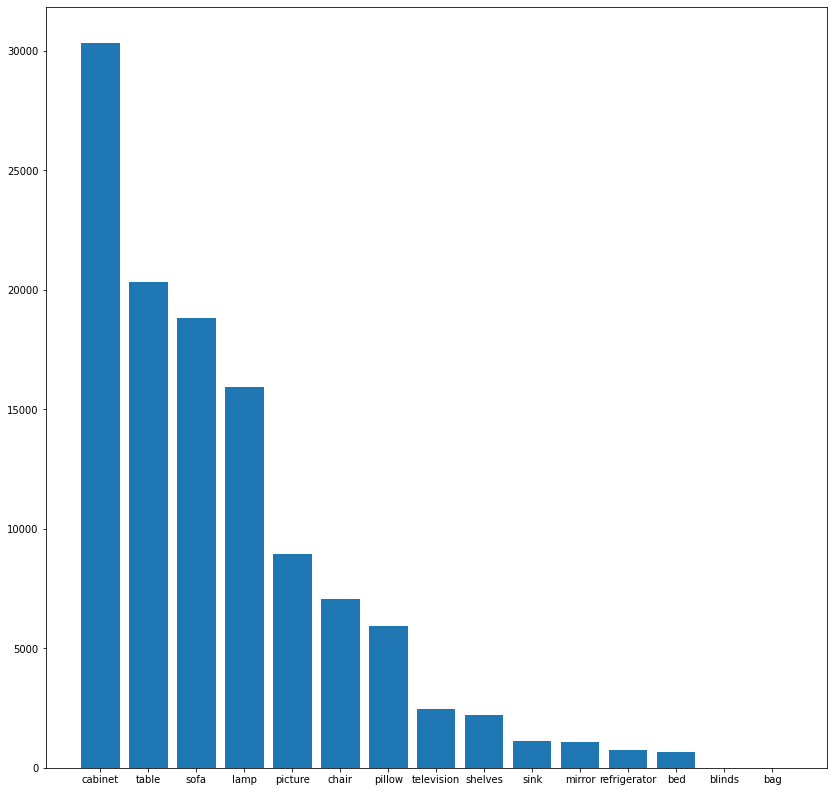

In [6]:
SAVE_DIR = 'data/InteriorNet/Results/data_inspection'

get_ax()
indices = np.argsort(instances_per_class[0])[::-1]
print(indices)
x = np.array(instances_per_class[0])
print(x)
sel_class_np = np.array(selected_classes)
plt.bar(x = list(range(len(x)-8)), height = x[indices][0:-8], tick_label=sel_class_np[indices][0:-8])
plt.savefig(os.path.join(ROOT_DIR, SAVE_DIR, 'all classes.png'))

/home/julius/Projects/MVOD/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


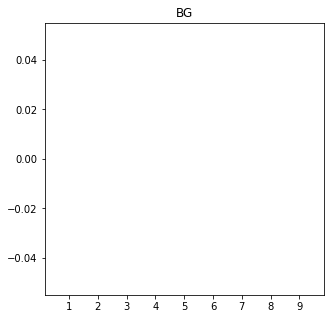

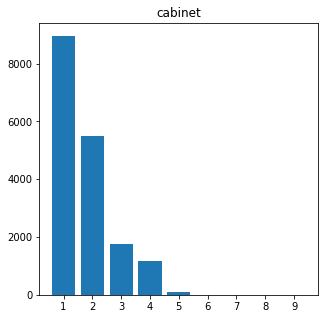

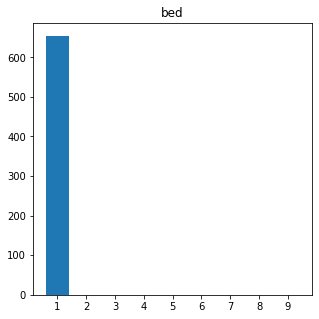

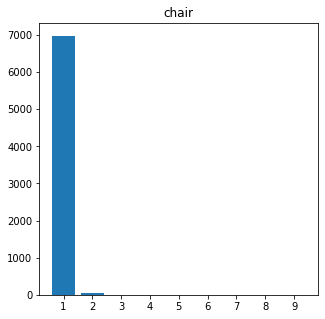

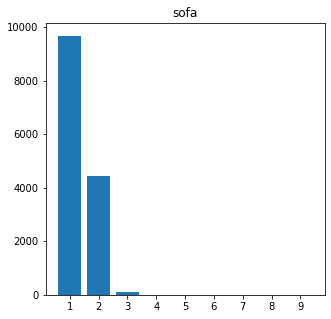

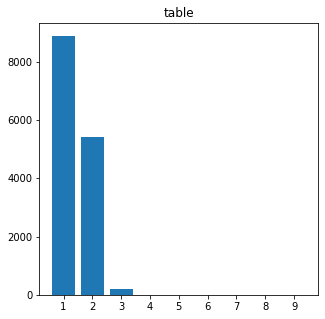

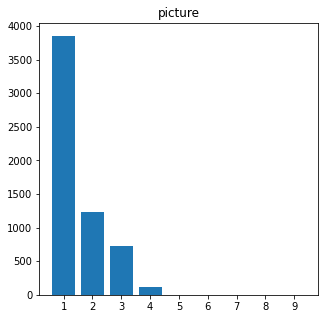

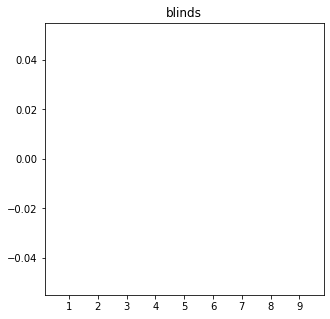

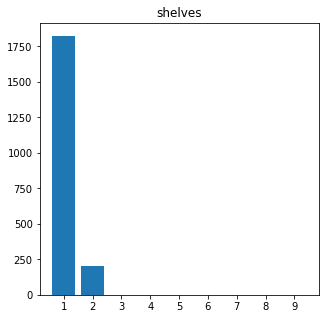

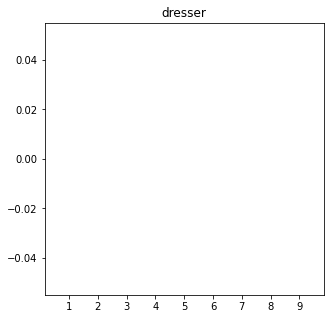

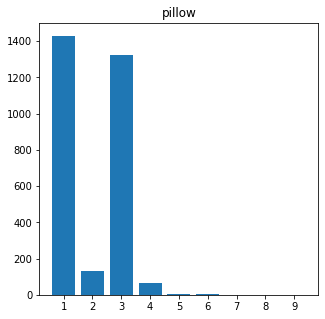

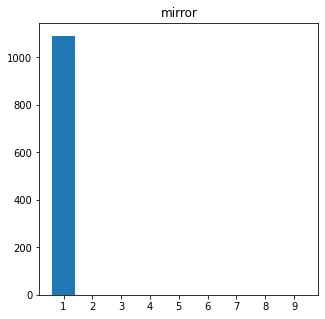

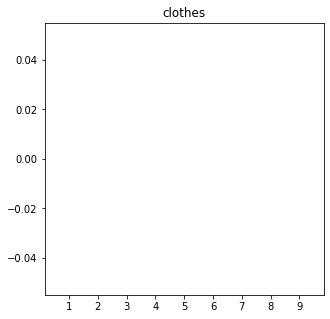

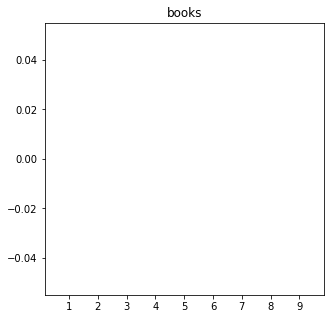

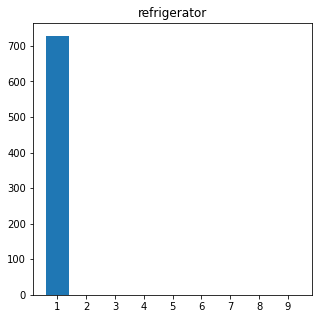

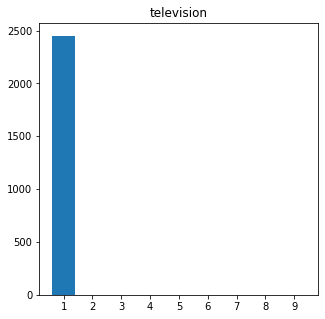

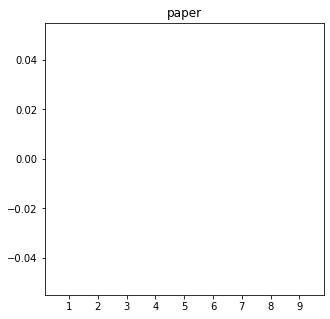

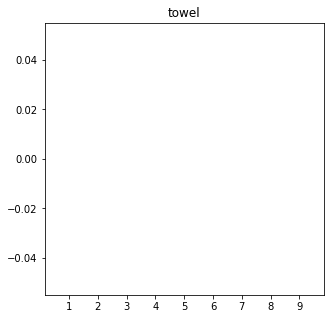

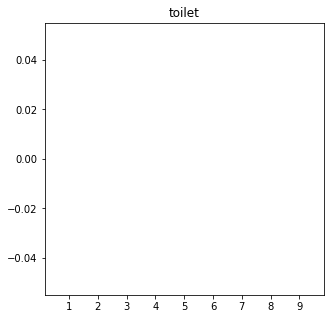

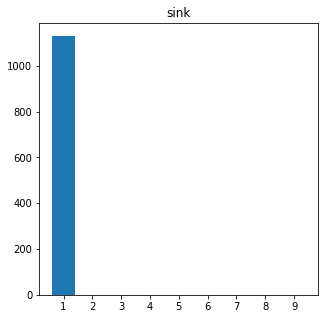

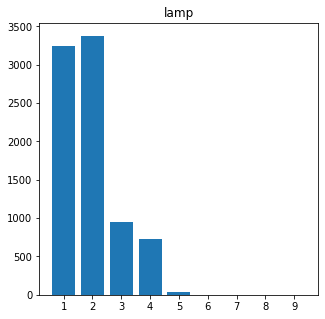

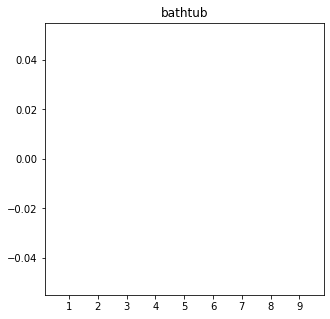

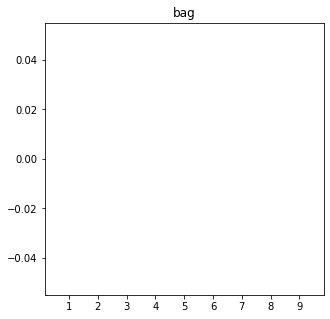

In [7]:
SAVE_DIR = 'data/InteriorNet/Results/data_inspection'
for i, class_name in enumerate(selected_classes):
    get_ax(size=5)
    plt.title(class_name)
    plt.bar(x=list(range(num_bins-1)), height=instances_per_class_image[0][i][1:], tick_label=list(range(1,num_bins)))
    plt.savefig(os.path.join(ROOT_DIR, SAVE_DIR, class_name))
    